In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler


In [2]:
player_data=pd.read_csv('../datasets/player_data.csv')
season_stats=pd.read_csv('../datasets/Seasons_Stats.csv')

In [3]:
season_stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [4]:
modified_season_stats=season_stats[season_stats['Year']>=1990]
modified_season_stats.shape

(15117, 53)

In [5]:
modified_season_stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
9547,9547,1990.0,Mark Acres,C,27.0,ORL,80.0,50.0,1691.0,8.3,...,0.692,154.0,277.0,431.0,67.0,36.0,25.0,70.0,248.0,362.0
9548,9548,1990.0,Michael Adams,PG,27.0,DEN,79.0,74.0,2690.0,15.4,...,0.850,49.0,176.0,225.0,495.0,121.0,3.0,141.0,133.0,1221.0
9549,9549,1990.0,Mark Aguirre,SF,30.0,DET,78.0,40.0,2005.0,15.8,...,0.756,117.0,188.0,305.0,145.0,34.0,19.0,121.0,201.0,1099.0
9550,9550,1990.0,Danny Ainge,PG,30.0,SAC,75.0,68.0,2727.0,16.1,...,0.831,69.0,257.0,326.0,453.0,113.0,18.0,185.0,238.0,1342.0
9551,9551,1990.0,Mark Alarie,PF,26.0,WSB,82.0,10.0,1893.0,14.1,...,0.812,151.0,223.0,374.0,142.0,60.0,39.0,101.0,219.0,860.0


In [6]:
# saving new csv with data from 1990 season - 2017 season
modified_season_stats.to_csv('../datasets/modified_season_stats.csv',index=False)

In [7]:
modified_season_stats.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,15117.0,17119.208639,4372.036618,9547.000,13333.000,17120.000,20905.000,24690.000
Year,15117.0,2004.208639,8.001439,1990.000,1997.000,2005.000,2011.000,2017.000
Age,15117.0,26.980419,4.149800,18.000,24.000,26.000,30.000,44.000
G,15117.0,48.359727,26.479480,1.000,25.000,52.000,74.000,85.000
GS,15117.0,23.121585,28.266137,0.000,0.000,8.000,43.000,83.000
MP,15117.0,1131.627770,916.677843,0.000,292.000,941.000,1838.000,3533.000
PER,15112.0,12.409880,6.289706,-90.600,9.600,12.600,15.600,129.100
TS%,15046.0,0.503097,0.096247,0.000,0.471,0.516,0.551,1.136
3PAr,15037.0,0.188216,0.195497,0.000,0.007,0.132,0.332,1.000
FTr,15037.0,0.314226,0.235232,0.000,0.190,0.280,0.390,6.000


In [8]:
# dropping two blank columns
modified_season_stats=modified_season_stats.drop(['blank2','blanl'],axis=1)

In [9]:
modified_season_stats.shape

(15117, 51)

In [10]:
modified_season_stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
9547,9547,1990.0,Mark Acres,C,27.0,ORL,80.0,50.0,1691.0,8.3,...,0.692,154.0,277.0,431.0,67.0,36.0,25.0,70.0,248.0,362.0
9548,9548,1990.0,Michael Adams,PG,27.0,DEN,79.0,74.0,2690.0,15.4,...,0.850,49.0,176.0,225.0,495.0,121.0,3.0,141.0,133.0,1221.0
9549,9549,1990.0,Mark Aguirre,SF,30.0,DET,78.0,40.0,2005.0,15.8,...,0.756,117.0,188.0,305.0,145.0,34.0,19.0,121.0,201.0,1099.0
9550,9550,1990.0,Danny Ainge,PG,30.0,SAC,75.0,68.0,2727.0,16.1,...,0.831,69.0,257.0,326.0,453.0,113.0,18.0,185.0,238.0,1342.0
9551,9551,1990.0,Mark Alarie,PF,26.0,WSB,82.0,10.0,1893.0,14.1,...,0.812,151.0,223.0,374.0,142.0,60.0,39.0,101.0,219.0,860.0


In [11]:
modified_season_stats['Index']=modified_season_stats['Unnamed: 0']

In [12]:
# dropping unnamed column
modified_season_stats=modified_season_stats.drop(['Unnamed: 0'],axis=1)

In [13]:
modified_season_stats[['Year', 'Age','G','GS','MP','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS']] = modified_season_stats[['Year', 'Age','G','GS','MP','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS']].astype('int')


In [14]:
# dropping irrelevant columns
# GS, 3Par, TS%, USG, TOV, WS/48, OBPM, DBPM, BPM, VORP, FGA, 3PA, 2PA, eFG%, FTA, 3P%, 2P%, TOV%, ORB%, 
# DRB%, TRB%, AST%, STL%, BLK%, FG%, FT% 

modified_season_stats=modified_season_stats.drop(['GS','3PAr','TS%','USG%','TOV','WS/48','OBPM','DBPM','BPM',
                                                 'VORP','FGA','3PA','2PA','eFG%','FTA', '3P%', '2P%','TOV%'
                                                  ,'ORB%','DRB%','TRB%','AST%','STL%','BLK%', 'FG%','FT%'],axis=1)

In [15]:
# normalizing the numerical attributes 
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        if df[feature_name].dtype=='int64' or df[feature_name].dtype=='float64' and (feature_name!='Age' or feature_name!='Year'):
            result[feature_name] = (df[feature_name] - df[feature_name].mean())/df[feature_name].std()
    return result

modified_season_stats['Age']=modified_season_stats['Age'].astype('str')
modified_season_stats['Year']=modified_season_stats['Year'].astype('str')

normalized_dataset=normalize(modified_season_stats)

normalized_dataset['Age']=normalized_dataset['Age'].astype('str')
normalized_dataset['Year']=normalized_dataset['Year'].astype('str')

normalized_dataset.describe()


,G,MP,PER,FTr,OWS,DWS,WS,FG,3P,2P,FT,ORB,DRB,TRB,AST,STL,BLK,PF,PTS,Index
count,1.511700e+04,1.511700e+04,1.511200e+04,1.503700e+04,1.511700e+04,1.511700e+04,1.511700e+04,1.511700e+04,1.511700e+04,1.511700e+04,1.511700e+04,1.511700e+04,1.511700e+04,1.511700e+04,15117.000000,1.511700e+04,1.511700e+04,1.511700e+04,1.511700e+04,1.511700e+04
mean,5.640347e-18,-1.128069e-16,9.403689e-19,1.209676e-16,-1.880116e-17,1.278479e-16,-1.353683e-16,-4.324266e-17,-6.016370e-17,-7.520463e-18,3.384208e-17,-7.520463e-18,7.872985e-17,-5.640347e-17,0.000000,3.760231e-17,-3.008185e-17,2.256139e-17,2.820174e-17,-2.406548e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.788544e+00,-1.234488e+00,-1.637754e+01,-1.335813e+00,-2.248362e+00,-1.779483e+00,-1.520155e+00,-1.012260e+00,-6.375813e-01,-9.620576e-01,-8.487327e-01,-8.905520e-01,-1.010335e+00,-1.001262e+00,-0.787061,-1.020896e+00,-6.646270e-01,-1.325325e+00,-9.993354e-01,-1.731964e+00
25%,-8.821823e-01,-9.159464e-01,-4.467426e-01,-5.281002e-01,-6.012218e-01,-7.834653e-01,-7.343710e-01,-8.207164e-01,-6.375813e-01,-7.864728e-01,-7.134074e-01,-7.313569e-01,-7.881046e-01,-7.774906e-01,-0.673706,-7.991929e-01,-5.783479e-01,-9.095147e-01,-8.115791e-01,-8.660057e-01
50%,1.374752e-01,-2.079550e-01,3.022724e-02,-1.454993e-01,-4.015685e-01,-2.854565e-01,-3.585613e-01,-3.157386e-01,-5.411957e-01,-3.312529e-01,-3.654279e-01,-3.652082e-01,-2.791251e-01,-2.943479e-01,-0.363868,-2.726483e-01,-3.482705e-01,-1.298703e-01,-3.152119e-01,1.810051e-04
75%,9.683073e-01,7.705785e-01,5.071971e-01,3.221240e-01,2.972183e-01,4.615567e-01,4.272225e-01,5.491083e-01,2.780817e-01,4.816399e-01,3.595293e-01,3.830086e-01,4.664225e-01,4.532518e-01,0.278480,5.033121e-01,1.406441e-01,7.407327e-01,5.415611e-01,8.659103e-01
max,1.383723e+00,2.619647e+00,1.855256e+01,2.417091e+01,6.835866e+00,6.603665e+00,6.166861e+00,4.989430e+00,9.049169e+00,5.287462e+00,6.458836e+00,7.435350e+00,6.208572e+00,6.779878e+00,8.009319,5.796470e+00,1.014901e+01,3.495476e+00,5.112456e+00,1.731640e+00


In [16]:
normalized_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15117 entries, 9547 to 24690
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    15117 non-null  object 
 1   Player  15117 non-null  object 
 2   Pos     15117 non-null  object 
 3   Age     15117 non-null  object 
 4   Tm      15117 non-null  object 
 5   G       15117 non-null  float64
 6   MP      15117 non-null  float64
 7   PER     15112 non-null  float64
 8   FTr     15037 non-null  float64
 9   OWS     15117 non-null  float64
 10  DWS     15117 non-null  float64
 11  WS      15117 non-null  float64
 12  FG      15117 non-null  float64
 13  3P      15117 non-null  float64
 14  2P      15117 non-null  float64
 15  FT      15117 non-null  float64
 16  ORB     15117 non-null  float64
 17  DRB     15117 non-null  float64
 18  TRB     15117 non-null  float64
 19  AST     15117 non-null  float64
 20  STL     15117 non-null  float64
 21  BLK     15117 non-null  float64


In [17]:
# filling NaN values with median
normalized_dataset=normalized_dataset.fillna(normalized_dataset.median())

In [18]:
# saving clean and normalised dataset 
normalized_dataset.to_csv('../datasets/normalized_dataset.csv',index=False)

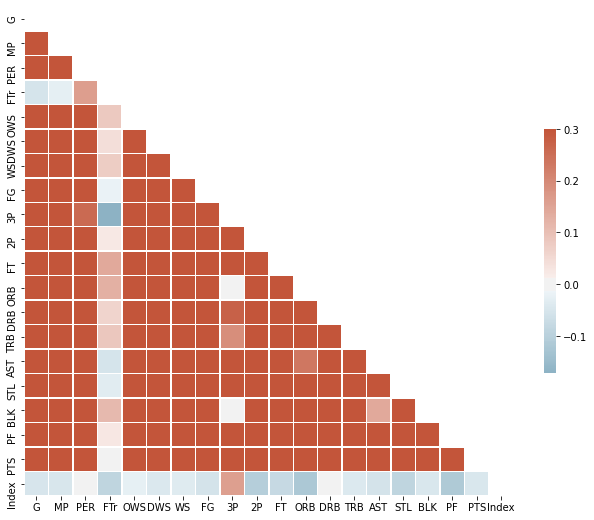

In [19]:
corr = normalized_dataset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [20]:
# sns.pairplot(normalized_dataset)